# Exploratory Data Analysis (EDA) - Employee Analysis

This notebook performs comprehensive exploratory data analysis on employee datasets to understand employee differences and patterns.

## Objectives
- Load and understand the structure of 3 starting files
- Identify join columns between datasets
- Create a central DataFrame by joining the files
- Calculate descriptive statistics on individual files and central dataset
- Generate visualizations to highlight key differences between employees
- Clean and prepare quantitative and qualitative columns

## Expected Results
- A central DataFrame from joining the starting files
- Descriptive statistics on starting files and central file
- Visualizations highlighting key employee differences
- Data cleaning and preparation recommendations

## 1. Import Required Libraries

In [367]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats
from scipy.stats import normaltest, shapiro

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('default')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## 2. Load and Inspect Individual Datasets

**Important**: Take time to understand column labels and content before rushing into analysis.

In [368]:
# Load the three starting datasets
# Loading actual datasets from raw folder
df_sirh = pd.read_csv('../../data/raw/extrait_sirh.csv')  # SIRH dataset
df_eval = pd.read_csv('../../data/raw/extrait_eval.csv')  # Evaluation dataset
df_sondage = pd.read_csv('../../data/raw/extrait_sondage.csv')  # Survey dataset

dfs = [df_sirh, df_eval, df_sondage]

for df in dfs:
	print(df.sample(1))

      id_employee  age genre  revenu_mensuel statut_marital departement  \
1294         1814   41     M            6870    Célibataire  Consulting   

        poste  nombre_experiences_precedentes  nombre_heures_travailless  \
1294  Manager                               3                         80   

      annee_experience_totale  annees_dans_l_entreprise  \
1294                       11                         3   

      annees_dans_le_poste_actuel  
1294                            2  
     satisfaction_employee_environnement  note_evaluation_precedente  \
527                                    4                           3   

     niveau_hierarchique_poste  satisfaction_employee_nature_travail  \
527                          2                                     4   

     satisfaction_employee_equipe  satisfaction_employee_equilibre_pro_perso  \
527                             4                                          2   

    eval_number  note_evaluation_actuelle heure_supple

## 3. Data Cleaning and Preprocessing

## 3. Descriptive Statistics on Individual Files

Analyze each file separately before joining to understand their individual characteristics.

In [369]:
# Function to analyze dataset characteristics
def analyze_dataset(df, dataset_name):
    print(f"=== {dataset_name} ANALYSIS ===")
    print(f"Shape: {df.shape}")
    print(f"Missing values:\n{df.isnull().sum()}")
    print(f"Duplicates: {df.duplicated().sum()}")
    
    # Identify quantitative and qualitative columns
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    print(f"\nQuantitative columns ({len(numerical_cols)}): {numerical_cols}")
    print(f"Qualitative columns ({len(categorical_cols)}): {categorical_cols}")
    
    if numerical_cols:
        print(f"\nNumerical summary:")
        print(df[numerical_cols].describe())
    
    if categorical_cols:
        print(f"\nCategorical summary:")
        for col in categorical_cols:
            print(f"{col}: {df[col].nunique()} unique values")
            if df[col].nunique() <= 10:
                print(f"  Values: {df[col].value_counts().to_dict()}")
    
    print("="*50)
    return numerical_cols, categorical_cols

# Analyze each dataset
num_cols_sirh, cat_cols_sirh = analyze_dataset(df_sirh, "SIRH DATASET")
num_cols_eval, cat_cols_eval = analyze_dataset(df_eval, "EVALUATION DATASET") 
num_cols_sondage, cat_cols_sondage = analyze_dataset(df_sondage, "SURVEY DATASET")

=== SIRH DATASET ANALYSIS ===
Shape: (1470, 12)
Missing values:
id_employee                       0
age                               0
genre                             0
revenu_mensuel                    0
statut_marital                    0
departement                       0
poste                             0
nombre_experiences_precedentes    0
nombre_heures_travailless         0
annee_experience_totale           0
annees_dans_l_entreprise          0
annees_dans_le_poste_actuel       0
dtype: int64
Duplicates: 0

Quantitative columns (8): ['id_employee', 'age', 'revenu_mensuel', 'nombre_experiences_precedentes', 'nombre_heures_travailless', 'annee_experience_totale', 'annees_dans_l_entreprise', 'annees_dans_le_poste_actuel']
Qualitative columns (4): ['genre', 'statut_marital', 'departement', 'poste']

Numerical summary:
       id_employee          age  revenu_mensuel  \
count  1470.000000  1470.000000     1470.000000   
mean   1024.865306    36.923810     6502.931293   
std     60

## 4. Missing Values Analysis

Check for missing values and data quality issues in each dataset before merging.

## 9. Data Cleaning (Optional)

Use pandas `.apply()` method to clean quantitative and qualitative columns if needed.

*Note: Current datasets appear clean based on analysis above. Add cleaning code here if issues are discovered.*

In [370]:
# Check for missing values in each dataset
print("=== MISSING VALUES ANALYSIS ===")

datasets = [(df_sirh, "SIRH Dataset"), (df_eval, "Evaluation Dataset"), (df_sondage, "Survey Dataset")]

for df, name in datasets:
    print(f"\n{name}:")
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Missing Count': missing_values,
        'Missing Percentage': missing_percentage
    })
    
    missing_data = missing_df[missing_df['Missing Count'] > 0]
    if len(missing_data) > 0:
        print(missing_data)
    else:
        print("No missing values found.")
    
    # Check for duplicate rows
    duplicates = df.duplicated().sum()
    print(f"Duplicate rows: {duplicates}")

print("\n" + "="*60)

=== MISSING VALUES ANALYSIS ===

SIRH Dataset:
No missing values found.
Duplicate rows: 0

Evaluation Dataset:
No missing values found.
Duplicate rows: 0

Survey Dataset:
No missing values found.
Duplicate rows: 0



## 5. Statistical Summary

In [371]:
# Summary statistics for each individual dataset
print("=== STATISTICAL SUMMARY FOR INDIVIDUAL DATASETS ===")

datasets = [(df_sirh, "SIRH Dataset"), (df_eval, "Evaluation Dataset"), (df_sondage, "Survey Dataset")]

for df, name in datasets:
    print(f"\n{name} Statistical Summary:")
    print("-" * 40)
    
    # Numerical variables
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    if len(numerical_columns) > 0:
        print("Numerical Variables:")
        print(df[numerical_columns].describe())
    else:
        print("No numerical variables found.")
    
    # Categorical variables
    categorical_columns = df.select_dtypes(include=['object']).columns
    if len(categorical_columns) > 0:
        print("\nCategorical Variables Summary:")
        for col in categorical_columns:
            print(f"\n{col}:")
            print(f"  - Unique values: {df[col].nunique()}")
            if df[col].nunique() > 0:
                most_freq = df[col].value_counts().index[0] if len(df[col].value_counts()) > 0 else 'N/A'
                print(f"  - Most frequent: {most_freq}")
                if df[col].nunique() <= 10:
                    print(f"  - Value counts: {df[col].value_counts().to_dict()}")
    else:
        print("No categorical variables found.")
    
    print("\n" + "="*60)

=== STATISTICAL SUMMARY FOR INDIVIDUAL DATASETS ===

SIRH Dataset Statistical Summary:
----------------------------------------
Numerical Variables:
       id_employee          age  revenu_mensuel  \
count  1470.000000  1470.000000     1470.000000   
mean   1024.865306    36.923810     6502.931293   
std     602.024335     9.135373     4707.956783   
min       1.000000    18.000000     1009.000000   
25%     491.250000    30.000000     2911.000000   
50%    1020.500000    36.000000     4919.000000   
75%    1555.750000    43.000000     8379.000000   
max    2068.000000    60.000000    19999.000000   

       nombre_experiences_precedentes  nombre_heures_travailless  \
count                     1470.000000                     1470.0   
mean                         2.693197                       80.0   
std                          2.498009                        0.0   
min                          0.000000                       80.0   
25%                          1.000000              

## 6. Data Visualization

Visualize individual datasets to understand distributions and patterns before merging.

=== IMPROVED VISUALIZATIONS FOR INDIVIDUAL DATASETS ===

📊 Creating visualizations for SIRH Dataset...
   Meaningful numerical columns: ['age', 'revenu_mensuel', 'nombre_experiences_precedentes', 'nombre_heures_travailless', 'annee_experience_totale', 'annees_dans_l_entreprise', 'annees_dans_le_poste_actuel']
   Excluded ID columns: ['id_employee']


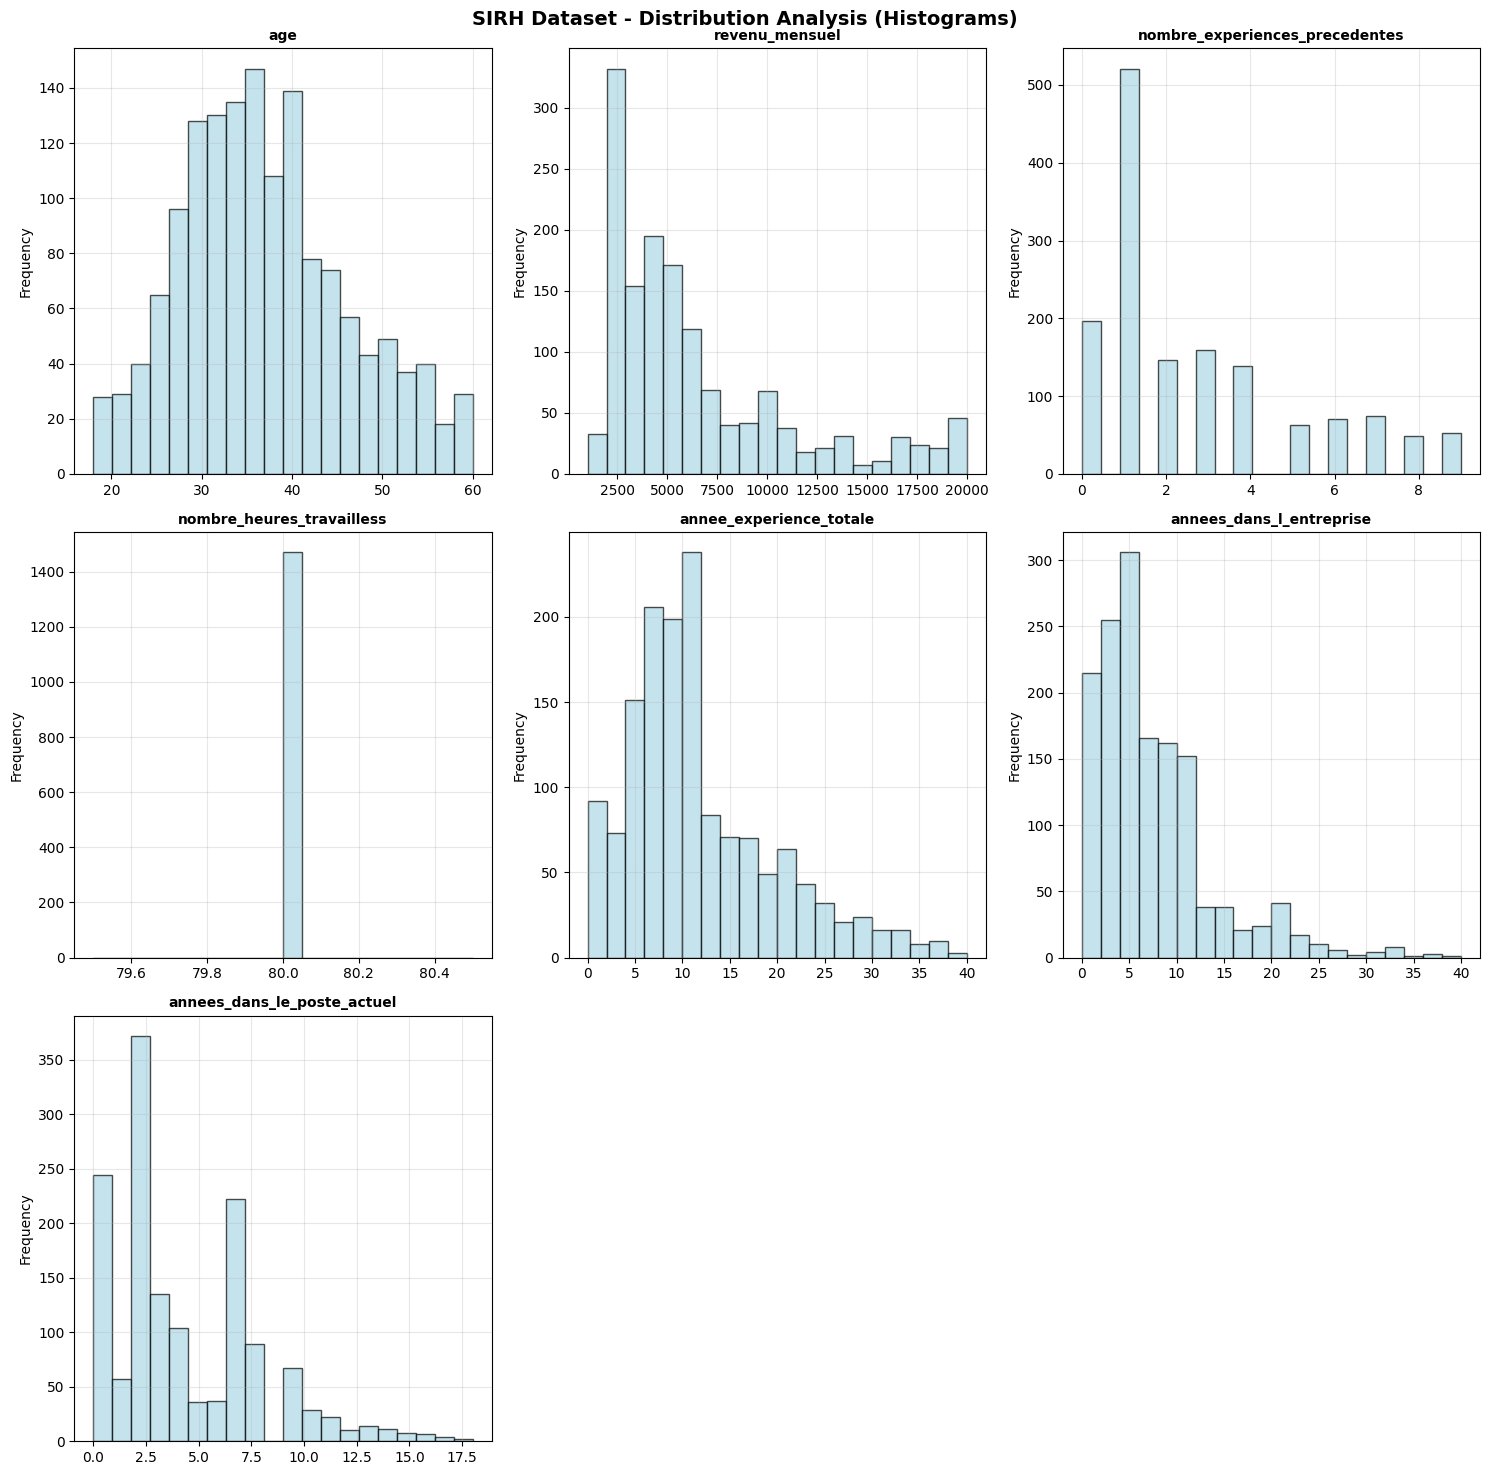

------------------------------------------------------------

📊 Creating visualizations for Evaluation Dataset...
   Meaningful numerical columns: ['satisfaction_employee_environnement', 'note_evaluation_precedente', 'niveau_hierarchique_poste', 'satisfaction_employee_nature_travail', 'satisfaction_employee_equipe', 'satisfaction_employee_equilibre_pro_perso', 'note_evaluation_actuelle']


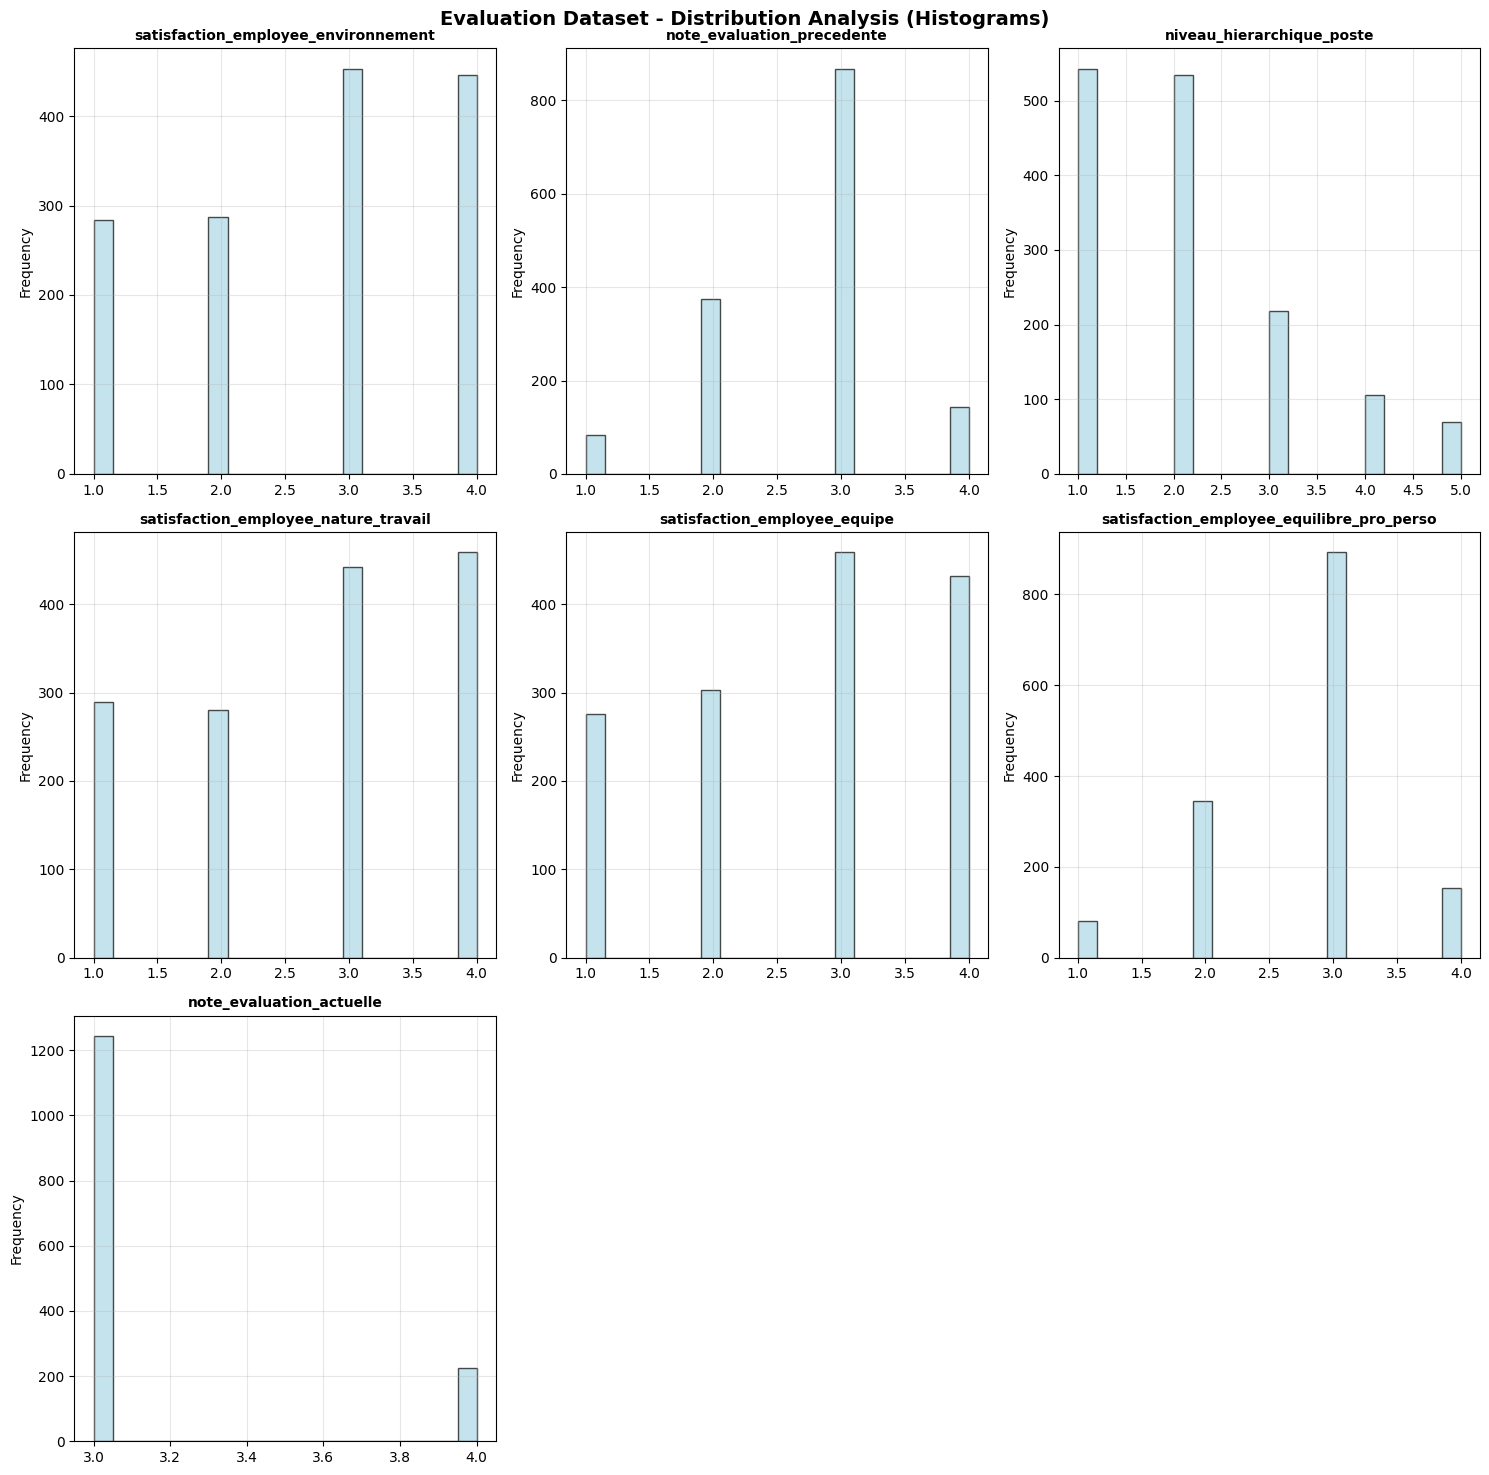

------------------------------------------------------------

📊 Creating visualizations for Survey Dataset...
   Meaningful numerical columns: ['nombre_participation_pee', 'nb_formations_suivies', 'nombre_employee_sous_responsabilite', 'distance_domicile_travail', 'niveau_education', 'annees_depuis_la_derniere_promotion', 'annes_sous_responsable_actuel']
   Excluded ID columns: ['code_sondage']


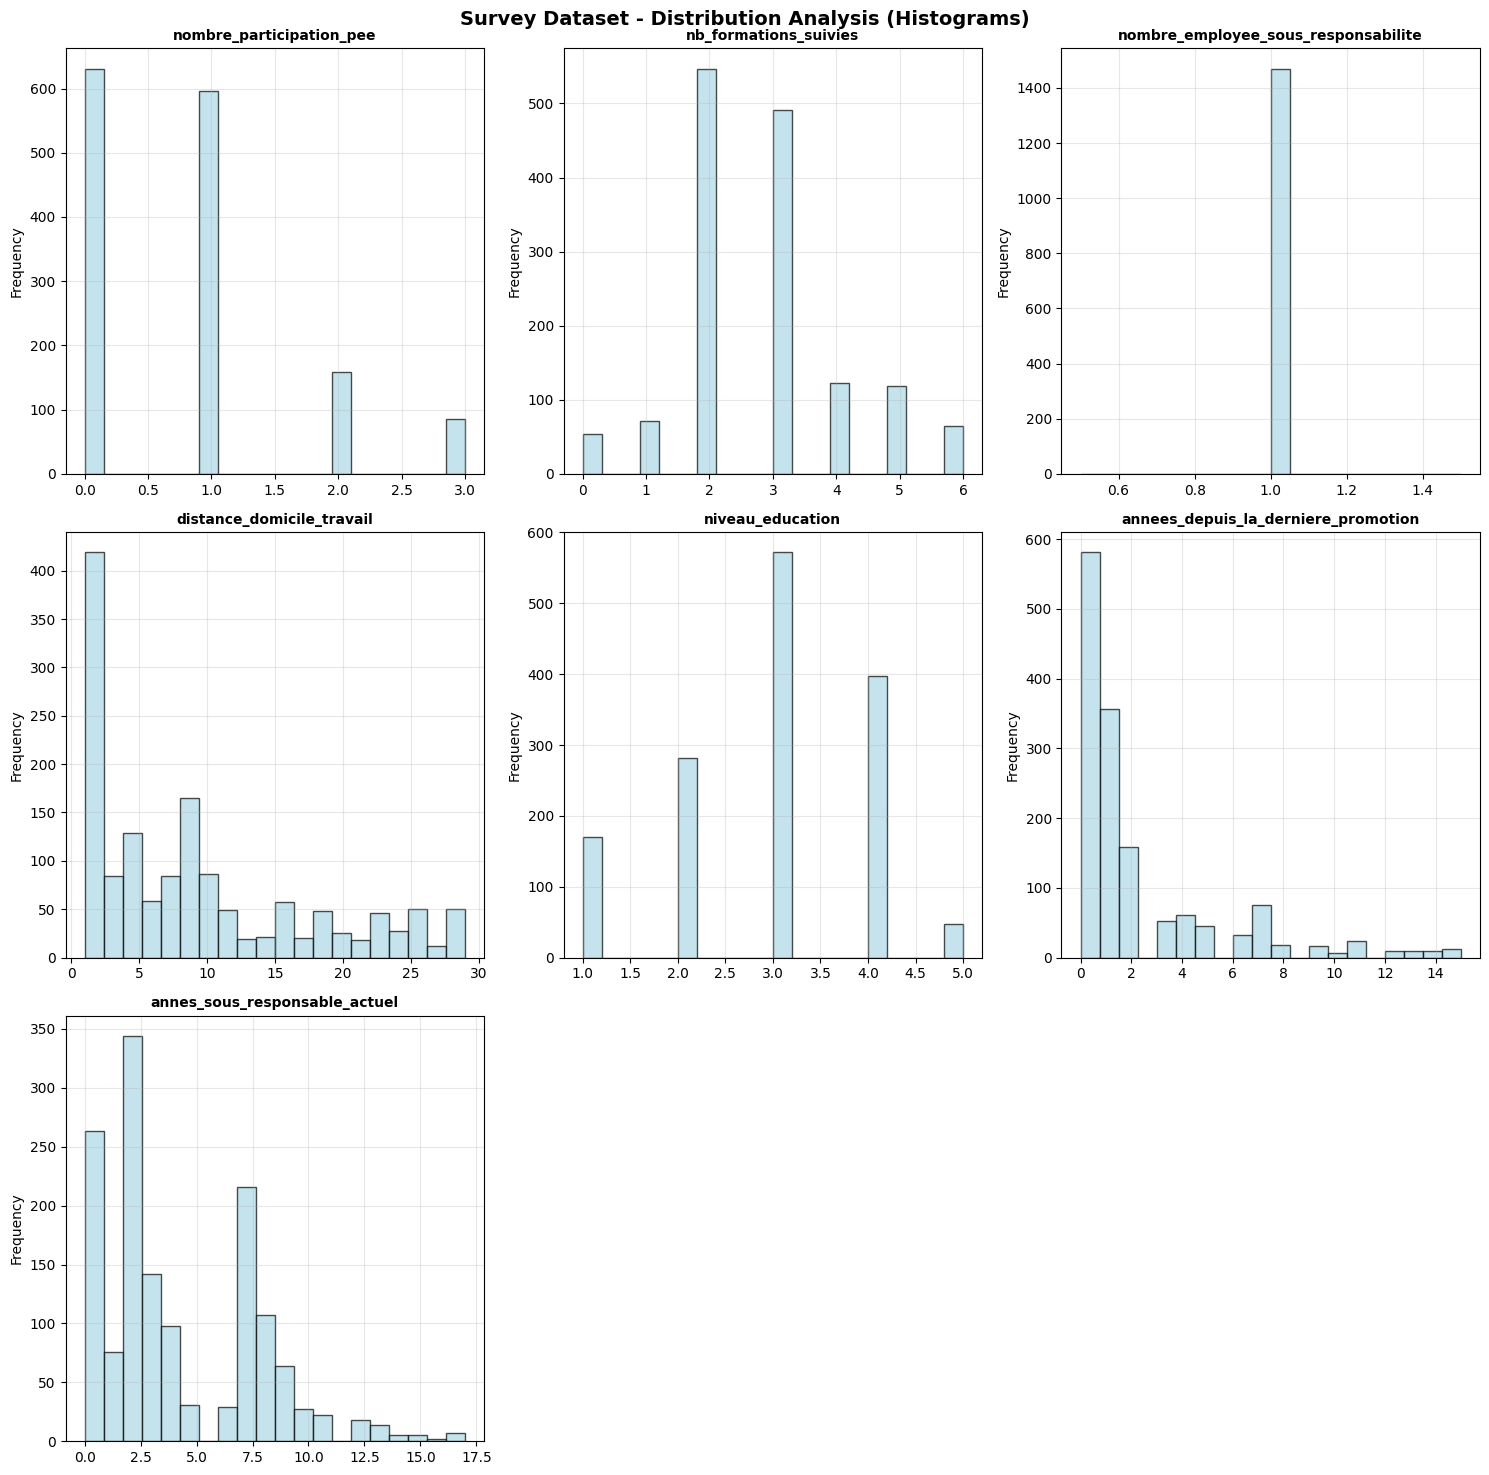

------------------------------------------------------------


In [372]:
# Improved visualization for numerical variables in individual datasets
print("=== IMPROVED VISUALIZATIONS FOR INDIVIDUAL DATASETS ===")

datasets = [(df_sirh, "SIRH Dataset"), (df_eval, "Evaluation Dataset"), (df_sondage, "Survey Dataset")]

for df, name in datasets:
    numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Filter out ID columns and other non-meaningful numerical columns
    id_columns = [col for col in numerical_columns if 'id' in col.lower() or 'number' in col.lower() or 'code' in col.lower()]
    meaningful_cols = [col for col in numerical_columns if col not in id_columns]
    
    if len(meaningful_cols) > 0:
        print(f"\n📊 Creating visualizations for {name}...")
        print(f"   Meaningful numerical columns: {meaningful_cols}")
        if id_columns:
            print(f"   Excluded ID columns: {id_columns}")
        
        # Use different visualization approaches based on number of columns
        if len(meaningful_cols) <= 4:
            # Box plots for fewer variables
            n_cols = min(2, len(meaningful_cols))
            n_rows = (len(meaningful_cols) + 1) // 2
            
            fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 6*n_rows))
            
            # Handle single subplot case
            if len(meaningful_cols) == 1:
                axes = [axes]
            elif n_rows == 1 and n_cols > 1:
                axes = axes
            elif n_rows > 1:
                axes = axes.ravel()
            else:
                axes = [axes]
            
            for i, col in enumerate(meaningful_cols):
                if i < len(axes):
                    # Create box plot with better styling
                    box_plot = axes[i].boxplot(df[col].dropna(), patch_artist=True)
                    
                    # Style the box plot
                    box_plot['boxes'][0].set_facecolor('lightblue')
                    box_plot['boxes'][0].set_alpha(0.7)
                    
                    axes[i].set_title(f'{col}', fontsize=12, fontweight='bold')
                    axes[i].set_ylabel('Values')
                    axes[i].grid(True, alpha=0.3)
                    
                    # Add some statistics as text
                    stats_text = f'Median: {df[col].median():.2f}\nMean: {df[col].mean():.2f}'
                    axes[i].text(0.02, 0.98, stats_text, transform=axes[i].transAxes, 
                               verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
            
            # Hide empty subplots
            for i in range(len(meaningful_cols), len(axes) if hasattr(axes, '__len__') else 1):
                if hasattr(axes, '__len__') and i < len(axes):
                    axes[i].set_visible(False)
            
            plt.suptitle(f'{name} - Distribution Analysis', fontsize=14, fontweight='bold')
            plt.tight_layout()
            plt.show()
            
        else:
            # For many variables, use histograms in a grid
            n_cols = 3
            n_rows = (len(meaningful_cols) + 2) // 3
            
            fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5*n_rows))
            axes = axes.ravel() if n_rows > 1 else [axes] if n_cols == 1 else axes
            
            for i, col in enumerate(meaningful_cols):
                if i < len(axes):
                    # Create histogram instead of box plot for better visibility
                    axes[i].hist(df[col].dropna(), bins=20, alpha=0.7, color='lightblue', edgecolor='black')
                    axes[i].set_title(f'{col}', fontsize=10, fontweight='bold')
                    axes[i].set_ylabel('Frequency')
                    axes[i].grid(True, alpha=0.3)
            
            # Hide empty subplots
            for i in range(len(meaningful_cols), len(axes)):
                axes[i].set_visible(False)
            
            plt.suptitle(f'{name} - Distribution Analysis (Histograms)', fontsize=14, fontweight='bold')
            plt.tight_layout()
            plt.show()
            
    else:
        print(f"❌ {name}: No meaningful numerical variables found for visualization.")
        if id_columns:
            print(f"   Only ID/identifier columns found: {id_columns}")
    
    print("-" * 60)

=== BAR PLOTS FOR INDIVIDUAL DATASETS ===

Creating bar plots for SIRH Dataset...


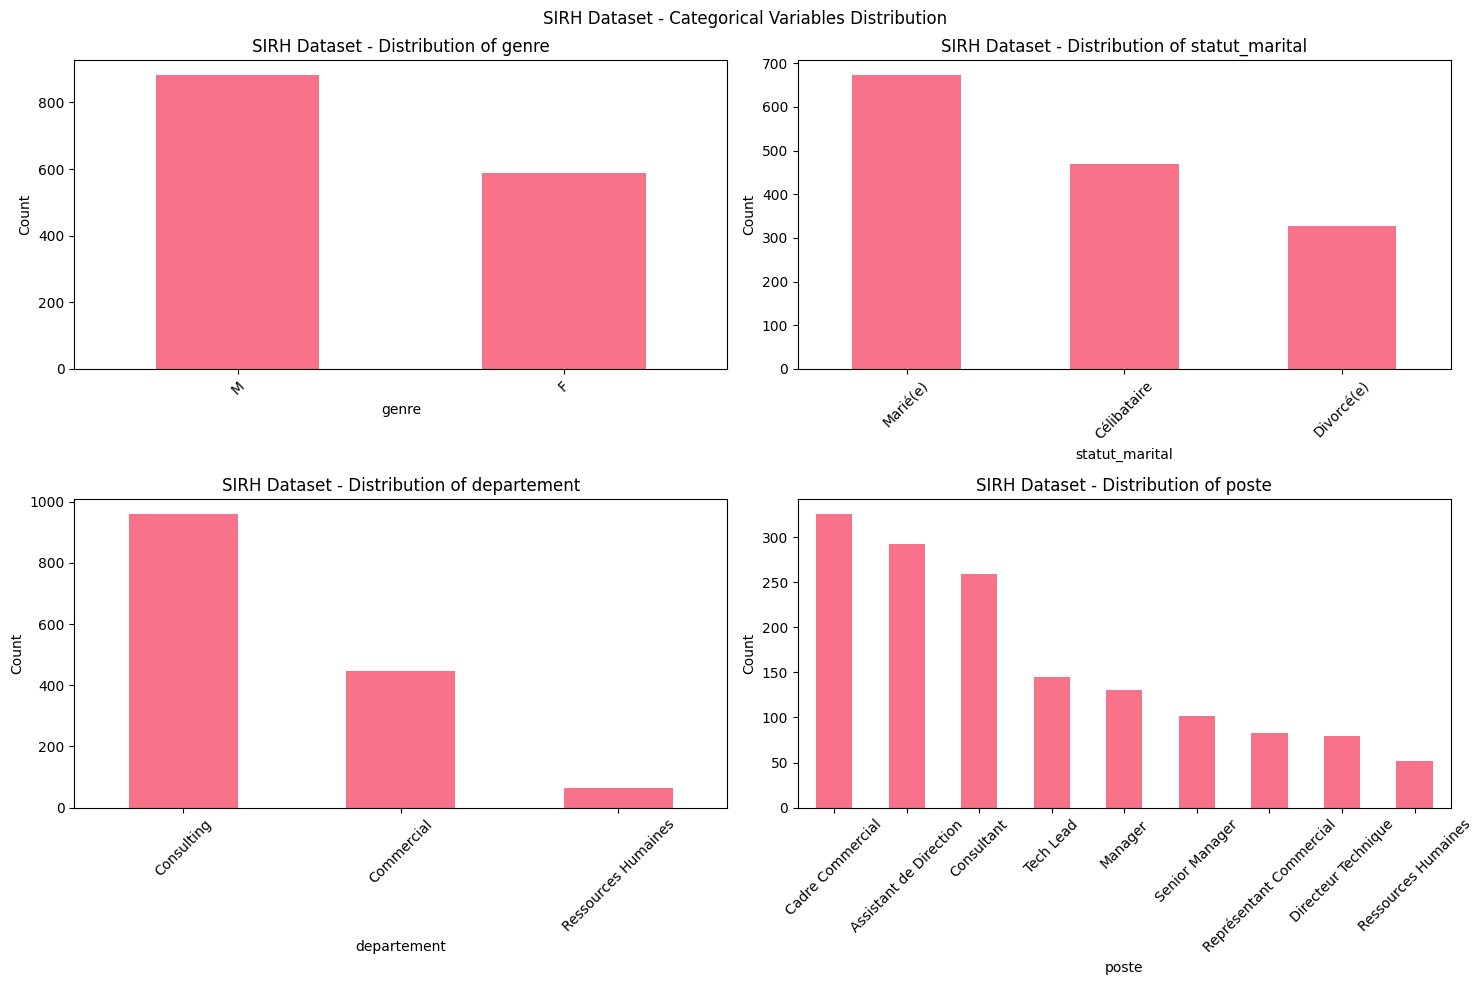


Creating bar plots for Evaluation Dataset...


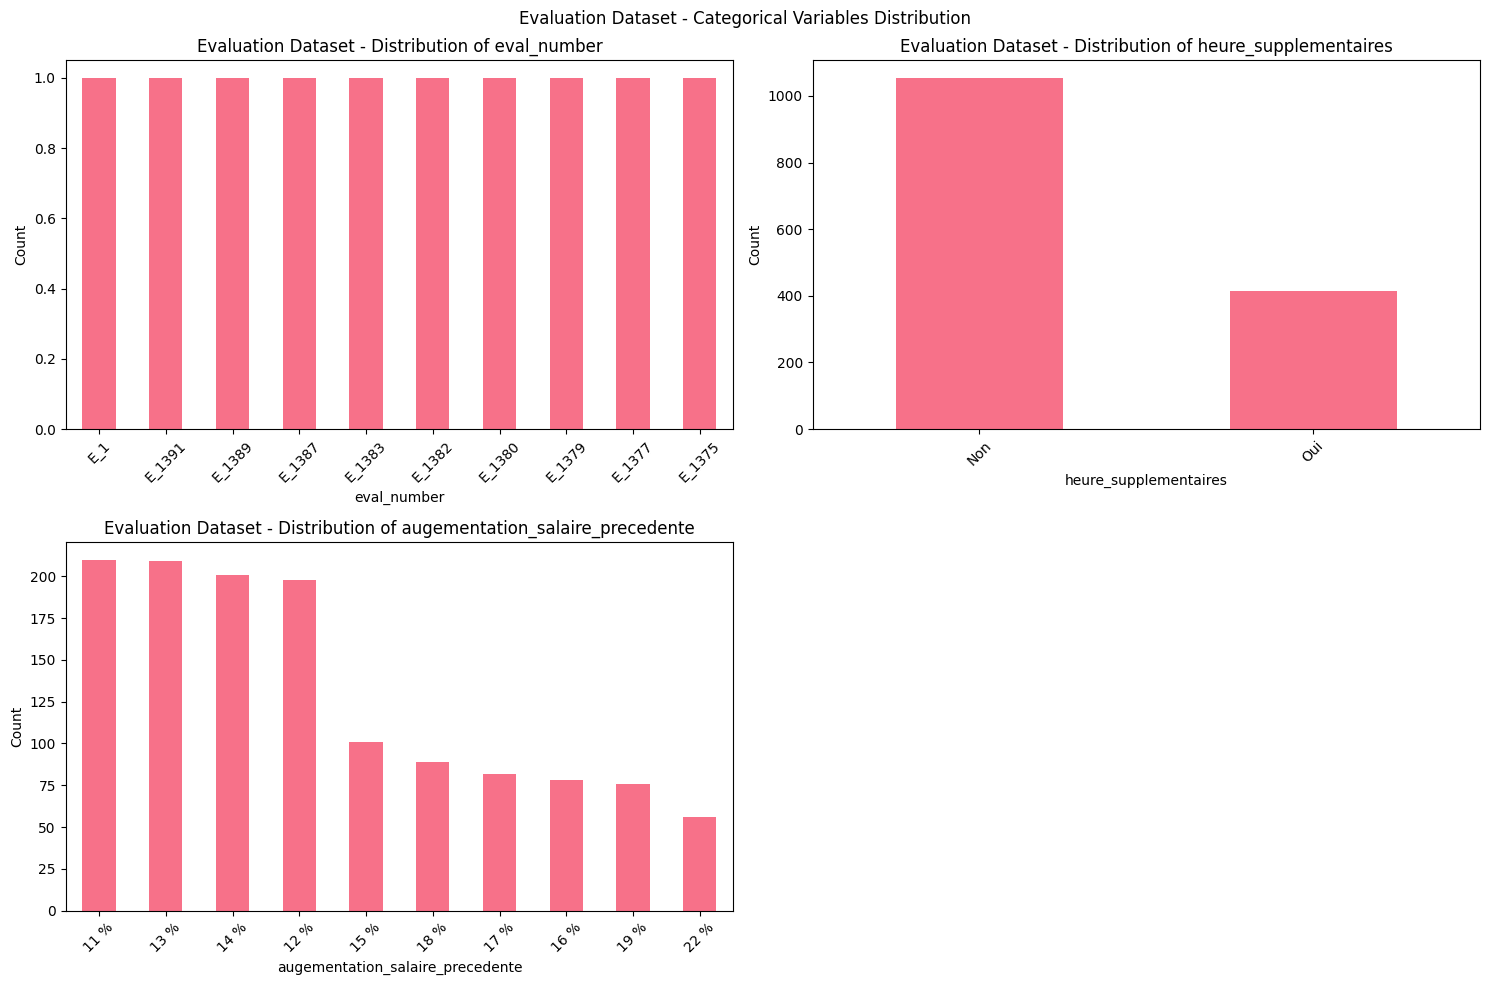


Creating bar plots for Survey Dataset...


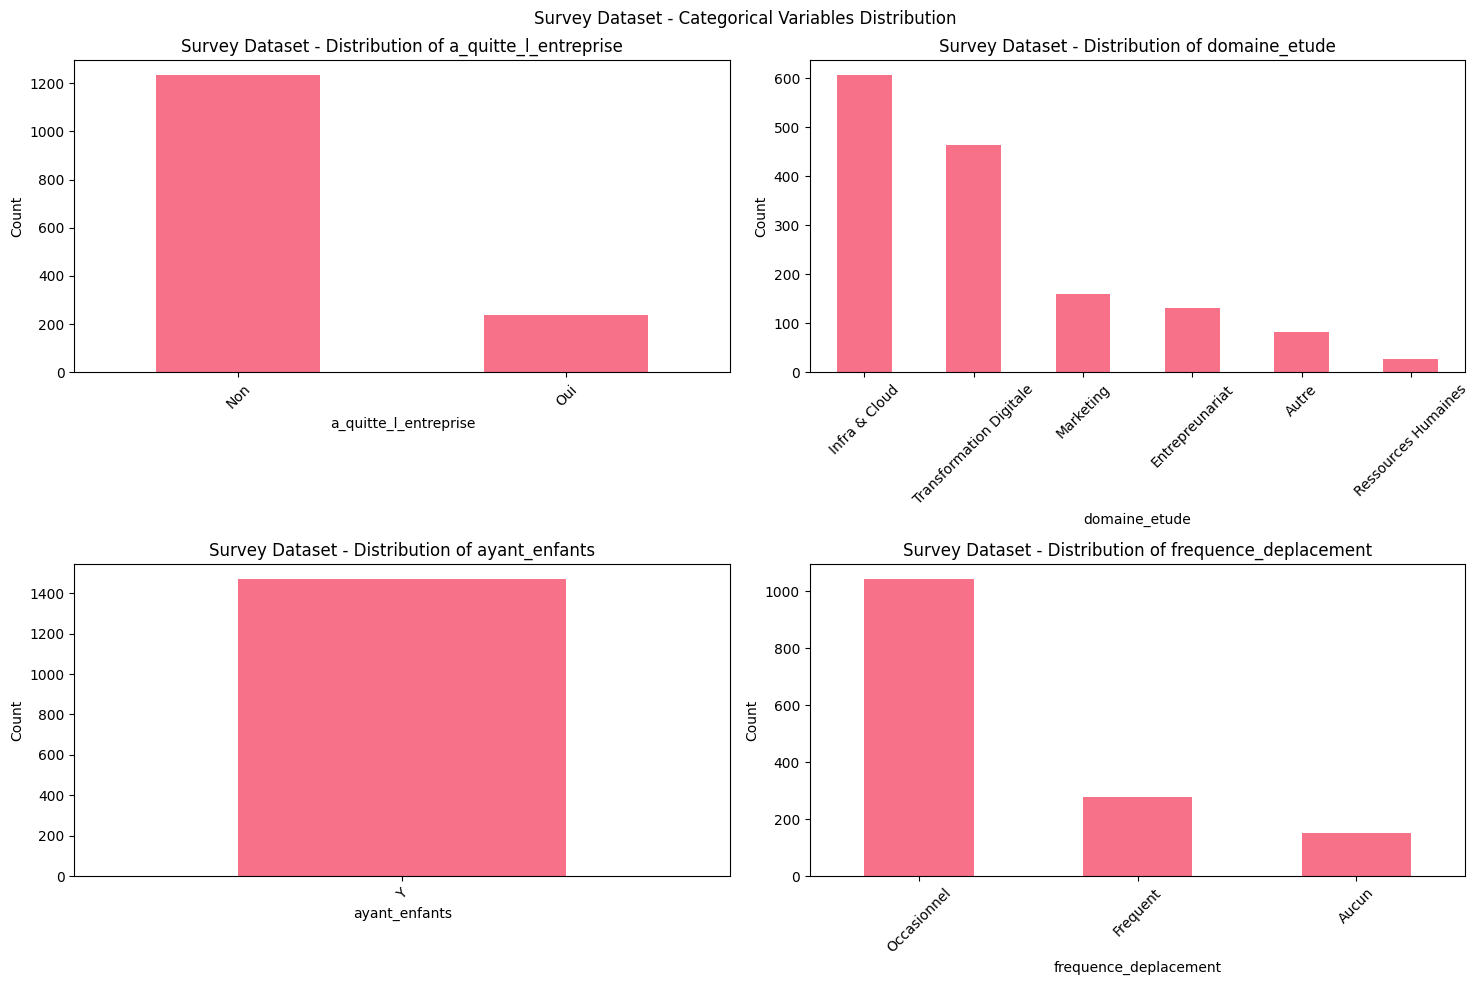

In [373]:
# Bar plots for categorical variables in individual datasets
print("=== BAR PLOTS FOR INDIVIDUAL DATASETS ===")

for df, name in datasets:
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    if len(categorical_columns) > 0:
        print(f"\nCreating bar plots for {name}...")
        
        # Calculate subplot dimensions
        n_cols = min(2, len(categorical_columns))
        n_rows = (len(categorical_columns) + 1) // 2
        
        fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5*n_rows))
        
        # Handle single subplot case
        if len(categorical_columns) == 1:
            axes = [axes]
        elif n_rows == 1:
            axes = [axes] if n_cols == 1 else axes
        else:
            axes = axes.ravel()
        
        for i, col in enumerate(categorical_columns):
            if i < len(axes):
                value_counts = df[col].value_counts().head(10)  # Top 10 values
                value_counts.plot(kind='bar', ax=axes[i])
                axes[i].set_title(f'{name} - Distribution of {col}')
                axes[i].set_xlabel(col)
                axes[i].set_ylabel('Count')
                axes[i].tick_params(axis='x', rotation=45)
        
        # Hide empty subplots
        for i in range(len(categorical_columns), len(axes)):
            axes[i].set_visible(False)
        
        plt.suptitle(f'{name} - Categorical Variables Distribution')
        plt.tight_layout()
        plt.show()
    else:
        print(f"{name}: No categorical variables found for bar plots.")

## 8. Visualizations to Highlight Employee Differences

**Choose appropriate chart types**:
- **Quanti vs Quanti**: Scatter plots, correlation heatmaps
- **Quanti vs Quali**: Box plots, violin plots, grouped bar charts
- **Quali vs Quali**: Stacked bar charts, crosstab heatmaps

## 7. Distribution Analysis

In [374]:
# Normality tests for numerical variables in each dataset
print("=== NORMALITY TESTS FOR INDIVIDUAL DATASETS ===")
print("Shapiro-Wilk test:")
print("H0: Data is normally distributed")
print("H1: Data is not normally distributed")
print("If p-value < 0.05, reject H0 (data is not normally distributed)\n")

for df, name in datasets:
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    
    if len(numerical_columns) > 0:
        print(f"\n{name} - Normality Tests:")
        print("-" * 40)
        
        for col in numerical_columns:
            if len(df[col].dropna()) > 3:  # Need at least 3 values for the test
                statistic, p_value = shapiro(df[col].dropna())
                result = "Normal" if p_value > 0.05 else "Not Normal"
                print(f"{col}: p-value = {p_value:.6f} -> {result}")
        
        print(f"\n{name} - Skewness and Kurtosis:")
        for col in numerical_columns:
            skew = df[col].skew()
            kurt = df[col].kurtosis()
            print(f"{col}: Skewness = {skew:.3f}, Kurtosis = {kurt:.3f}")
    else:
        print(f"{name}: No numerical variables found for normality tests.")
    
    print("\n" + "="*60)

=== NORMALITY TESTS FOR INDIVIDUAL DATASETS ===
Shapiro-Wilk test:
H0: Data is normally distributed
H1: Data is not normally distributed
If p-value < 0.05, reject H0 (data is not normally distributed)


SIRH Dataset - Normality Tests:
----------------------------------------
id_employee: p-value = 0.000000 -> Not Normal
age: p-value = 0.000000 -> Not Normal
revenu_mensuel: p-value = 0.000000 -> Not Normal
nombre_experiences_precedentes: p-value = 0.000000 -> Not Normal
nombre_heures_travailless: p-value = 1.000000 -> Normal
annee_experience_totale: p-value = 0.000000 -> Not Normal
annees_dans_l_entreprise: p-value = 0.000000 -> Not Normal
annees_dans_le_poste_actuel: p-value = 0.000000 -> Not Normal

SIRH Dataset - Skewness and Kurtosis:
id_employee: Skewness = 0.017, Kurtosis = -1.223
age: Skewness = 0.413, Kurtosis = -0.404
revenu_mensuel: Skewness = 1.370, Kurtosis = 1.005
nombre_experiences_precedentes: Skewness = 1.026, Kurtosis = 0.010
nombre_heures_travailless: Skewness = 0.000,

## 8. Outlier Detection

In [375]:
# Outlier detection using IQR method for each dataset
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("=== OUTLIER DETECTION FOR INDIVIDUAL DATASETS ===")
print("Using IQR method:")
print("="*60)

for df, name in datasets:
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    
    if len(numerical_columns) > 0:
        print(f"\n{name} - Outlier Analysis:")
        print("-" * 40)
        
        for col in numerical_columns:
            outliers, lower_bound, upper_bound = detect_outliers_iqr(df, col)
            outlier_count = len(outliers)
            outlier_percentage = (outlier_count / len(df)) * 100
            
            print(f"\n{col}:")
            print(f"  - Outliers count: {outlier_count} ({outlier_percentage:.2f}%)")
            print(f"  - Lower bound: {lower_bound:.3f}")
            print(f"  - Upper bound: {upper_bound:.3f}")
            
            if outlier_count > 0 and outlier_count <= 10:
                print(f"  - Outlier values: {outliers[col].tolist()}")
    else:
        print(f"{name}: No numerical variables found for outlier detection.")
    
    print("\n" + "="*60)

=== OUTLIER DETECTION FOR INDIVIDUAL DATASETS ===
Using IQR method:

SIRH Dataset - Outlier Analysis:
----------------------------------------

id_employee:
  - Outliers count: 0 (0.00%)
  - Lower bound: -1105.500
  - Upper bound: 3152.500

age:
  - Outliers count: 0 (0.00%)
  - Lower bound: 10.500
  - Upper bound: 62.500

revenu_mensuel:
  - Outliers count: 114 (7.76%)
  - Lower bound: -5291.000
  - Upper bound: 16581.000

nombre_experiences_precedentes:
  - Outliers count: 52 (3.54%)
  - Lower bound: -3.500
  - Upper bound: 8.500

nombre_heures_travailless:
  - Outliers count: 0 (0.00%)
  - Lower bound: 80.000
  - Upper bound: 80.000

annee_experience_totale:
  - Outliers count: 63 (4.29%)
  - Lower bound: -7.500
  - Upper bound: 28.500

annees_dans_l_entreprise:
  - Outliers count: 104 (7.07%)
  - Lower bound: -6.000
  - Upper bound: 18.000

annees_dans_le_poste_actuel:
  - Outliers count: 21 (1.43%)
  - Lower bound: -5.500
  - Upper bound: 14.500


Evaluation Dataset - Outlier Anal

## 9. Data cleaning

In [376]:
# Delete nombre_heures_travailless - same value for all rows
if len(df_sirh['nombre_heures_travailless'].value_counts()) == 1:
	df_sirh.drop(columns=['nombre_heures_travailless'], inplace=True)


In [377]:
# Delete nombre_employee_sous_responsabilite - same value for all rows
if len(df_sondage['nombre_employee_sous_responsabilite'].value_counts()) == 1:
	df_sondage.drop(columns=['nombre_employee_sous_responsabilite'], inplace=True)

## 10. Create Central DataFrame by Joining

After completing individual dataset analysis, create the central DataFrame by joining all datasets.
Join type used is `left` to retain all employees from SIRH dataset.

In [378]:
# Merge both df_sirh on 'id_employee' (ex: 10) and df_eval datasets on 'eval_number' ex("E_10")
# Clean eval_number column if it contains 'E_' prefix
if df_eval['eval_number'].dtype == 'object':
    df_eval['eval_number'] = df_eval['eval_number'].str.replace('E_', '').astype(int)

# Ensure id_employee is integer
df_sirh['id_employee'] = df_sirh['id_employee'].astype(int)

# Perform the merges
df_sirh_eval = pd.merge(df_sirh, df_eval, left_on='id_employee', right_on='eval_number', how='left')
df_sirh_eval_sondage = pd.merge(df_sirh_eval, df_sondage, left_on='id_employee', right_on='code_sondage', how='left')

analyze_dataset(df_sirh_eval_sondage, "FINAL MERGED DATASET (SIRH, EVALUATION & SURVEY)")

=== FINAL MERGED DATASET (SIRH, EVALUATION & SURVEY) ANALYSIS ===
Shape: (1470, 32)
Missing values:
id_employee                                  0
age                                          0
genre                                        0
revenu_mensuel                               0
statut_marital                               0
departement                                  0
poste                                        0
nombre_experiences_precedentes               0
annee_experience_totale                      0
annees_dans_l_entreprise                     0
annees_dans_le_poste_actuel                  0
satisfaction_employee_environnement          0
note_evaluation_precedente                   0
niveau_hierarchique_poste                    0
satisfaction_employee_nature_travail         0
satisfaction_employee_equipe                 0
satisfaction_employee_equilibre_pro_perso    0
eval_number                                  0
note_evaluation_actuelle                     0
heure_s

(['id_employee',
  'age',
  'revenu_mensuel',
  'nombre_experiences_precedentes',
  'annee_experience_totale',
  'annees_dans_l_entreprise',
  'annees_dans_le_poste_actuel',
  'satisfaction_employee_environnement',
  'note_evaluation_precedente',
  'niveau_hierarchique_poste',
  'satisfaction_employee_nature_travail',
  'satisfaction_employee_equipe',
  'satisfaction_employee_equilibre_pro_perso',
  'eval_number',
  'note_evaluation_actuelle',
  'nombre_participation_pee',
  'nb_formations_suivies',
  'code_sondage',
  'distance_domicile_travail',
  'niveau_education',
  'annees_depuis_la_derniere_promotion',
  'annes_sous_responsable_actuel'],
 ['genre',
  'statut_marital',
  'departement',
  'poste',
  'heure_supplementaires',
  'augementation_salaire_precedente',
  'a_quitte_l_entreprise',
  'domaine_etude',
  'ayant_enfants',
  'frequence_deplacement'])

## 10.1 Merge Verification and Validation

Let's verify the merge operations step by step to ensure data integrity.

In [379]:
print("=== MERGE VERIFICATION ANALYSIS ===")
print("="*60)

# 1. Original dataset sizes
print("1. ORIGINAL DATASET SIZES:")
print(f"   SIRH dataset: {df_sirh.shape[0]} rows, {df_sirh.shape[1]} columns")
print(f"   Evaluation dataset: {df_eval.shape[0]} rows, {df_eval.shape[1]} columns") 
print(f"   Survey dataset: {df_sondage.shape[0]} rows, {df_sondage.shape[1]} columns")

# 2. Check uniqueness of join keys (current state)
print("\n2. JOIN KEY UNIQUENESS (CURRENT STATE):")
print(f"   SIRH 'id_employee' unique values: {df_sirh['id_employee'].nunique()} / {len(df_sirh)} ({df_sirh['id_employee'].nunique()/len(df_sirh)*100:.1f}% unique)")
print(f"   Evaluation 'eval_number' unique values: {df_eval['eval_number'].nunique()} / {len(df_eval)} ({df_eval['eval_number'].nunique()/len(df_eval)*100:.1f}% unique)")
print(f"   Survey 'code_sondage' unique values: {df_sondage['code_sondage'].nunique()} / {len(df_sondage)} ({df_sondage['code_sondage'].nunique()/len(df_sondage)*100:.1f}% unique)")

# 3. Check the data types and sample values
print("\n3. KEY DATA TYPES AND SAMPLES:")
print(f"   SIRH id_employee type: {df_sirh['id_employee'].dtype}, samples: {df_sirh['id_employee'].head(3).tolist()}")
print(f"   Evaluation eval_number type: {df_eval['eval_number'].dtype}, samples: {df_eval['eval_number'].head(3).tolist()}")
print(f"   Survey code_sondage type: {df_sondage['code_sondage'].dtype}, samples: {df_sondage['code_sondage'].head(3).tolist()}")

# 4. Check overlaps between keys
print("\n4. KEY OVERLAP ANALYSIS:")
sirh_ids = set(df_sirh['id_employee'])
eval_ids = set(df_eval['eval_number'])
survey_ids = set(df_sondage['code_sondage'])

overlap_sirh_eval = sirh_ids & eval_ids
overlap_sirh_survey = sirh_ids & survey_ids
overlap_eval_survey = eval_ids & survey_ids
all_overlap = sirh_ids & eval_ids & survey_ids

print(f"   SIRH ∩ Evaluation: {len(overlap_sirh_eval)} common IDs")
print(f"   SIRH ∩ Survey: {len(overlap_sirh_survey)} common IDs") 
print(f"   Evaluation ∩ Survey: {len(overlap_eval_survey)} common IDs")
print(f"   All three datasets: {len(all_overlap)} common IDs")

# 5. Merged dataset sizes
print("\n5. MERGED DATASET SIZES:")
print(f"   SIRH + Evaluation: {df_sirh_eval.shape[0]} rows, {df_sirh_eval.shape[1]} columns")
print(f"   Final (all three): {df_sirh_eval_sondage.shape[0]} rows, {df_sirh_eval_sondage.shape[1]} columns")

print("\n" + "="*60)

=== MERGE VERIFICATION ANALYSIS ===
1. ORIGINAL DATASET SIZES:
   SIRH dataset: 1470 rows, 11 columns
   Evaluation dataset: 1470 rows, 10 columns
   Survey dataset: 1470 rows, 11 columns

2. JOIN KEY UNIQUENESS (CURRENT STATE):
   SIRH 'id_employee' unique values: 1470 / 1470 (100.0% unique)
   Evaluation 'eval_number' unique values: 1470 / 1470 (100.0% unique)
   Survey 'code_sondage' unique values: 1470 / 1470 (100.0% unique)

3. KEY DATA TYPES AND SAMPLES:
   SIRH id_employee type: int64, samples: [1, 2, 4]
   Evaluation eval_number type: int64, samples: [1, 2, 4]
   Survey code_sondage type: int64, samples: [1, 2, 4]

4. KEY OVERLAP ANALYSIS:
   SIRH ∩ Evaluation: 1470 common IDs
   SIRH ∩ Survey: 1470 common IDs
   Evaluation ∩ Survey: 1470 common IDs
   All three datasets: 1470 common IDs

5. MERGED DATASET SIZES:
   SIRH + Evaluation: 1470 rows, 21 columns
   Final (all three): 1470 rows, 32 columns



In [380]:
print("=== DETAILED MERGE VALIDATION ===")
print("="*50)

# 6. Check for data loss/duplication in merges
print("6. MERGE IMPACT ANALYSIS:")

# First merge (SIRH + Evaluation)
sirh_lost = len(df_sirh) - len(df_sirh_eval[df_sirh_eval['eval_number'].notna()])
eval_lost = len(df_eval) - len(df_sirh_eval[df_sirh_eval['eval_number'].notna()])

print(f"   First merge (SIRH + Evaluation with LEFT join):")
print(f"     - SIRH records retained: {len(df_sirh_eval)} / {len(df_sirh)} ({len(df_sirh_eval)/len(df_sirh)*100:.1f}%)")
print(f"     - Evaluation data matched: {len(df_sirh_eval[df_sirh_eval['eval_number'].notna()])} / {len(df_eval)} ({len(df_sirh_eval[df_sirh_eval['eval_number'].notna()])/len(df_eval)*100:.1f}%)")

# Second merge (+ Survey)
sirh_eval_lost = len(df_sirh_eval) - len(df_sirh_eval_sondage[df_sirh_eval_sondage['code_sondage'].notna()])
survey_lost = len(df_sondage) - len(df_sirh_eval_sondage[df_sirh_eval_sondage['code_sondage'].notna()])

print(f"\n   Second merge (+ Survey with LEFT join):")
print(f"     - SIRH+Eval records retained: {len(df_sirh_eval_sondage)} / {len(df_sirh_eval)} ({len(df_sirh_eval_sondage)/len(df_sirh_eval)*100:.1f}%)")
print(f"     - Survey data matched: {len(df_sirh_eval_sondage[df_sirh_eval_sondage['code_sondage'].notna()])} / {len(df_sondage)} ({len(df_sirh_eval_sondage[df_sirh_eval_sondage['code_sondage'].notna()])/len(df_sondage)*100:.1f}%)")

# 7. Check for duplicates after merge
print("\n7. DUPLICATE CHECK AFTER MERGES:")
print(f"   Duplicates in SIRH+Eval: {df_sirh_eval.duplicated().sum()}")
print(f"   Duplicates in final dataset: {df_sirh_eval_sondage.duplicated().sum()}")

# 8. Missing values introduced by merges
print("\n8. MISSING VALUES INTRODUCED:")
sirh_eval_missing = df_sirh_eval.isnull().sum().sum() - df_sirh.isnull().sum().sum()
final_missing = df_sirh_eval_sondage.isnull().sum().sum() - df_sirh_eval.isnull().sum().sum()

print(f"   Missing values added in first merge: {sirh_eval_missing}")
print(f"   Missing values added in second merge: {final_missing}")

print("\n" + "="*50)

=== DETAILED MERGE VALIDATION ===
6. MERGE IMPACT ANALYSIS:
   First merge (SIRH + Evaluation with LEFT join):
     - SIRH records retained: 1470 / 1470 (100.0%)
     - Evaluation data matched: 1470 / 1470 (100.0%)

   Second merge (+ Survey with LEFT join):
     - SIRH+Eval records retained: 1470 / 1470 (100.0%)
     - Survey data matched: 1470 / 1470 (100.0%)

7. DUPLICATE CHECK AFTER MERGES:
   Duplicates in SIRH+Eval: 0
   Duplicates in final dataset: 0

8. MISSING VALUES INTRODUCED:
   Missing values added in first merge: 0
   Missing values added in second merge: 0



In [381]:
print("=== MERGE QUALITY ASSESSMENT ===")
print("="*45)

# 9. Sample verification - show some merged records
print("9. SAMPLE MERGED DATA VERIFICATION:")
print("\nFirst 3 records with all data present:")
complete_records = df_sirh_eval_sondage[
    (df_sirh_eval_sondage['eval_number'].notna()) & 
    (df_sirh_eval_sondage['code_sondage'].notna())
]

if len(complete_records) > 0:
    sample_cols = ['id_employee', 'eval_number', 'code_sondage']
    available_cols = [col for col in sample_cols if col in complete_records.columns]
    print(complete_records[available_cols].head(3))
    print(f"\nTotal records with all three sources: {len(complete_records)}")
else:
    print("No records found with data from all three sources!")

# 10. Key relationship verification
print("\n10. KEY RELATIONSHIP VERIFICATION:")
print("Checking if id_employee = eval_number = code_sondage after formatting...")

if len(complete_records) > 0:
    # Check if the keys match for records that have all data
    id_eval_match = (complete_records['id_employee'] == complete_records['eval_number']).all()
    id_survey_match = (complete_records['id_employee'] == complete_records['code_sondage']).all()
    
    print(f"   id_employee == eval_number: {id_eval_match}")
    print(f"   id_employee == code_sondage: {id_survey_match}")
    
    if id_eval_match and id_survey_match:
        print("   ✅ All keys match perfectly - merge is correct!")
    else:
        print("   ⚠️  Key mismatch detected - needs investigation")
        
        # Show mismatches
        id_eval_mismatch = complete_records[complete_records['id_employee'] != complete_records['eval_number']]
        id_survey_mismatch = complete_records[complete_records['id_employee'] != complete_records['code_sondage']]
        
        if len(id_eval_mismatch) > 0:
            print(f"   ID-Eval mismatches: {len(id_eval_mismatch)} records")
        if len(id_survey_mismatch) > 0:
            print(f"   ID-Survey mismatches: {len(id_survey_mismatch)} records")

print("\n" + "="*45)

=== MERGE QUALITY ASSESSMENT ===
9. SAMPLE MERGED DATA VERIFICATION:

First 3 records with all data present:
   id_employee  eval_number  code_sondage
0            1            1             1
1            2            2             2
2            4            4             4

Total records with all three sources: 1470

10. KEY RELATIONSHIP VERIFICATION:
Checking if id_employee = eval_number = code_sondage after formatting...
   id_employee == eval_number: True
   id_employee == code_sondage: True
   ✅ All keys match perfectly - merge is correct!



In [382]:
# Save the cleaned and merged dataset
print("💾 Saving cleaned dataset...")

import os

# Create the processed directory if it doesn't exist
processed_dir = '../../data/processed'
os.makedirs(processed_dir, exist_ok=True)

# Remove redundant id columns after merge
df_sirh_eval_sondage.drop(columns=["eval_number", "code_sondage"], inplace=True)

# Save the final merged dataset (overwrite existing file)
output_path = '../../data/processed/employee_data_merged_clean.csv'
df_sirh_eval_sondage.to_csv(output_path, index=False)

print(f"✅ Dataset saved to: {output_path}")
print(f"📊 Dataset contains: {df_sirh_eval_sondage.shape[0]} employees with {df_sirh_eval_sondage.shape[1]} features")
print("📝 File will be overwritten on each run - no timestamped backups")

💾 Saving cleaned dataset...
✅ Dataset saved to: ../../data/processed/employee_data_merged_clean.csv
📊 Dataset contains: 1470 employees with 30 features
📝 File will be overwritten on each run - no timestamped backups
